# Анализ поведения пользователей в мобильном приложении

## Краткое описание проекта
Существует приложение как платформа по продаже/обмену вещей. В этом приложении пользователи совершают какие-то действия прежде чем совершить целевое действие. Целевым действием считается `просмотр контактов` - `contacts_show`, после которого пользователь с определённой вероятностью совершит звонок.

## Цели исследования: 

**Получить на основе поведения пользователей гипотезы о том, как можно было бы улучшить приложение с точки зрения пользовательского опыта.**

## Задачи и этапы исследования: 


**1. Проанализировать связь целевого события — просмотра контактов — и других действий пользователей.**

- В разрезе сесий отбрать сценарии/патерны, которые приводят к просмотру контактов.
- Построить воронки по основным сценариям в разрезе уникальных пользователей.

**2. Оценить, какие действия чаще совершают те пользователи, которые просматривают контакты.**
- Рассчитать относительную частоту событий в разрезе двух групп пользователей:

     - группа пользователей, которые смотрели контакты
     - группа пользователей, которые не смотрели контакты 

## 1. Предобработка данных

### 1.1. Загрузка данных

### 1.2. Приведение названий столбцов к принятому стилю

### 1.3. Изменение типов данных

### 1.4. Проверка пропущенных данных

### 1.5. Проверка наличия дубликатов

### 1.6. Объединение данных

## 2. Исследовательский анализ данных

### 2.1. Нахождение сценариев поведения пользователей, которые приводят к просмотру контактов

### 2.2. Построение воронок по основным сценариям в разрезе уникальных пользователей

### 2.3. Построение диаграммы Санкея

### 2.4. Расчет относительной частоты событий в разрезе двух групп пользователей:

     - группа пользователей, которые смотрели контакты
     - группа пользователей, которые не смотрели контакты     
### 2.5. Проверка гипотез
1. Одни пользователи совершают действия `tips_show` и `tips_click`, другие - только `tips_show`. Гипотеза: конверсия в просмотры контактов различается у этих групп.
2. Одни пользователи совершают действия `search`, другие `tips_show`. Гипотеза: конверсия в просмотры контактов различается у этих групп.     

## 3. Выводы и рекомендации

### Описание данных

Таблица **users**:
- `user_id` — идентификатор пользователя,
- `source` — источник, с которого пользователь установил приложение.

Таблица **events**:
- `event.time` — время совершения,
- `user.id` — идентификатор пользователя,
- `event.name` — действие пользователя.

Виды действий пользователей в столбце `event.name`:
- `advert_open` — открыл карточки объявления,
- `photos_show` — просмотрел фотографий в объявлении,
- `tips_show` — увидел рекомендованные объявления,
- `tips_click` — кликнул по рекомендованному объявлению,
- `contacts_show` и `show_contacts` — посмотрел номер телефона,
- `contacts_call` — позвонил по номеру из объявления,
- `map` — открыл карту объявлений,
- `search_1` — `search_7` — разные действия, связанные с поиском по сайту,
- `favorites_add` — добавил объявление в избранное.

## 1. Предобработка данных

### 1.1. Загрузка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# загрузим данные
users = pd.read_csv('https://...')
users.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [3]:
# загрузим данные
events = pd.read_csv('https://...')
events.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


### 1.2. Приведение названий столбцов к принятому стилю

In [4]:
# приведём названия столбца к принятому стилю
users = users.rename(columns={'userId': 'user_id'})

In [5]:
# приведём названия столбцов к принятому стилю
events = events.rename(columns={'event.time': 'event_time', 
                                'event.name': 'event_name', 
                                'user.id': 'user_id'})

In [6]:
# получим общую информацию о данных
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  4293 non-null   object
 1   source   4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [7]:
# получим общую информацию о данных
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_time  74197 non-null  object
 1   event_name  74197 non-null  object
 2   user_id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


### 1.3. Изменение типов данных

In [8]:
# преобразование столбца "event_time" в тип данных datetime
events['event_time'] = pd.to_datetime(events['event_time'])
events['event_time'].dtypes

dtype('<M8[ns]')

### 1.4. Проверка пропущенных данных

Общая информация о данных говорит о том, что пропущенных данных в таблицах нет.

### 1.5. Проверка наличия дубликатов

In [9]:
# проверим наличие явных дубликатов
users.duplicated().sum()

0

In [10]:
# проверим наличие явных дубликатов
events.duplicated().sum()

0

Явных дубликатов в данных нет.

### 1.6. Объединение  данных

In [11]:
# посмотрим на распределение данных в столбце sours таблицы users
users['source'].value_counts()

source
yandex    1934
other     1230
google    1129
Name: count, dtype: int64

In [12]:
# посмотрим на распределение данных в столбце event_name таблицы events
events['event_name'].value_counts()

event_name
tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: count, dtype: int64

Среди действий пользователя есть 'show_contacts' и 'contacts_show', объединим эти данные, так как это одно и тоже действие пользователя. 

Также объединим данные с различным видом поиска "search_1" — "search_7" в категорию "search".

In [13]:
# объединим данные 'show_contacts' и 'contacts_show', так как это одно и тоже действие пользователя
events.loc[events['event_name'] == 'show_contacts', 'event_name'] = 'contacts_show'

In [14]:
# объединим данные с различным видом поиска "search_1" — "search_7" в категорию "search".
events['event_name'] = events['event_name'].str.replace(r'search_\d+', 'search', regex=True)

In [15]:
# проверим объединение
events['event_name'].value_counts()

event_name
tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: count, dtype: int64

In [16]:
# посмотрим на временной отрезок, который охватывают данные
events['event_time'].min()

Timestamp('2019-10-07 00:00:00.431357')

In [17]:
events['event_time'].max()

Timestamp('2019-11-03 23:58:12.532487')

### 1.7. Выводы по предобработке данных
В результате предобработки данных было выполнено следующее.
1. Названия столбцов были приведены к принятому "питоновскому" стилю.
2. Тип данных в столбце `event_time` был изменен на тип `дата`.
3. Общая информация о данных показала отсутсвие пропущеных данных.
4. Проведена проверка на дубликаты.
5. Объединены данные, которые назваются по разному, но означают одно и тоже действие пользователя `show_contacts` и `contacts_show`. Объединены даные по семи видам поиска в одно действие пользователя - поиск.

## 2. Исследовательский анализ данных

### 2.1.  Нахождение сценариев поведения пользователей, которые приводят к просмотру контактов

Для выделения сценариев, которые приводят к просмотру контактов, отсортируем данные по `user_id` и `event_time`

In [18]:
# отсортируем данные по 'user_id' и 'event_time'
events = events.sort_values(['user_id', 'event_time'])
events

,event_time,event_name,user_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
...,...,...,...
72584,2019-11-03 15:51:23.959572,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b
72589,2019-11-03 15:51:57.899997,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b
72684,2019-11-03 16:07:40.932077,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b
72688,2019-11-03 16:08:18.202734,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b


Для обоснованного разделения данных на сессии посмотрим на распределение интервалов между действиями пользователя

In [19]:
# создадим копию данных
events_time_diff = events.copy()

In [20]:
# найдём интервалы между действиями пользователя  
events_time_diff['time_diff'] = events_time_diff.groupby('user_id')['event_time'].diff()

In [21]:
# преобразуем значения столбца time_diff в секунды
events_time_diff['time_diff_seconds'] = events_time_diff['time_diff'].dt.total_seconds()

# преобразуем значения в минуты
events_time_diff['time_diff_minutes'] = events_time_diff['time_diff_seconds'] / 60

# удаляем столбец time_diff_seconds
events_time_diff = events_time_diff.drop('time_diff_seconds', axis=1)

events_time_diff.head()

,event_time,event_name,user_id,time_diff,time_diff_minutes
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,NaT,NaN
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0 days 00:00:45.063550,0.751059
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0 days 00:00:34.669580,0.577826
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0 days 00:02:15.012972,2.250216
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0 days 00:02:10.182041,2.169701


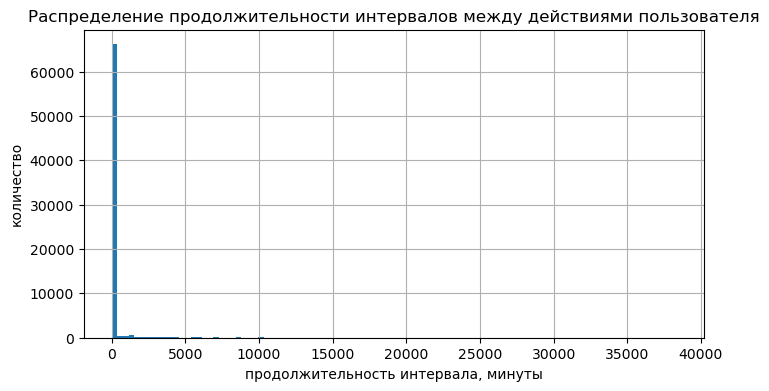

In [22]:
# Посмотрим на гистграмму распределения интервалов
fig, ax = plt.subplots(figsize=(8, 4))
events_time_diff['time_diff_minutes'].hist(bins=100)
ax.set(title = 'Распределение продолжительности интервалов между действиями пользователя', 
       xlabel = 'продолжительность интервала, минуты', ylabel = 'количество');

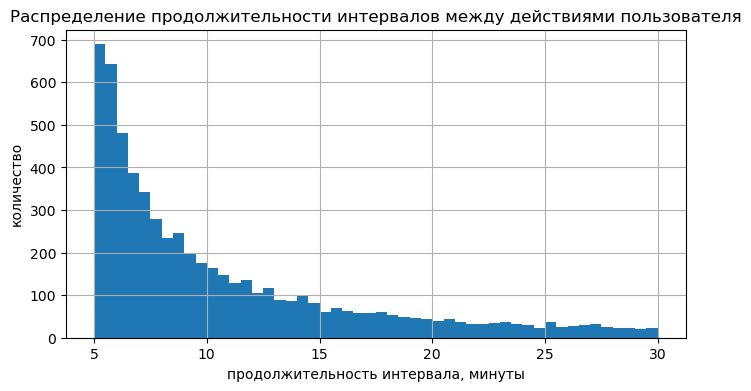

In [23]:
# посмотрим на интервал до 30 минут
fig, ax = plt.subplots(figsize=(8, 4))
events_time_diff['time_diff_minutes'].hist(bins=50, range=(5, 30))
ax.set(title = 'Распределение продолжительности интервалов между действиями пользователя', 
       xlabel = 'продолжительность интервала, минуты', ylabel = 'количество');

In [24]:
# посмотрим на описательную статистику интервала
events_time_diff['time_diff_minutes'].describe()

count    6.990400e+04
mean     2.330195e+02
std      1.532954e+03
min      1.666667e-08
25%      3.932374e-01
50%      1.175589e+00
75%      3.005008e+00
max      3.826991e+04
Name: time_diff_minutes, dtype: float64

Мы видим, что в 75% случаев интервал между действиями пользователя не превышает 3-х минут. Для практического расчета можно взять 90-й процентиль интервала. Этим мы отсечём тех, пользователей, которые совершают следующее действие через интервал от 17 минут и до нескольких дней. Действия пользователя с такими интервалами не стоит считать одной сессией.

In [25]:
# найдём 90-й процентиль
percentile_90 = events_time_diff['time_diff_minutes'].quantile(0.90)
print(f"90-й процентиль: {percentile_90} минут")

90-й процентиль: 17.013457728333357 минут


Разделим действия пользователя на сессии, используя разделитель 17 минут бездействия пользователя. Таким образом мы получим сессии действий пользователя, в которых интервал между ближайшими событиями не превышает 17 минут. Если между событиями интервал превышает 17 минут, то эти события попадут в разные сессии.

In [26]:
# разделим данные на сессии, используя разделитель 17 минут бездействия пользователя
g = (events.groupby('user_id')['event_time'].diff() > pd.Timedelta('17Min')).cumsum()
events['session_id'] = events.groupby(['user_id', g], sort=False).ngroup() + 1
events

,event_time,event_name,user_id,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
...,...,...,...,...
72584,2019-11-03 15:51:23.959572,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,11286
72589,2019-11-03 15:51:57.899997,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,11286
72684,2019-11-03 16:07:40.932077,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,11286
72688,2019-11-03 16:08:18.202734,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,11286


In [27]:
# удалим повторяющиеся действия пользователей в рамках сессий
events_unique = events.drop_duplicates(subset=['event_name', 'user_id', 'session_id'])
events_unique

,event_time,event_name,user_id,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
6541,2019-10-09 18:33:55.577963,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2
6565,2019-10-09 18:40:28.738785,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2
36412,2019-10-21 19:52:30.778932,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3
36419,2019-10-21 19:53:38.767230,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3
...,...,...,...,...
70772,2019-11-02 19:26:07.834494,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,11284
72321,2019-11-03 14:32:55.956301,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,11285
72325,2019-11-03 14:33:47.921863,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,11285
72487,2019-11-03 15:36:01.007440,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,11286


In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
# добавим шаги в рамках сессии
events_unique.loc[:, 'step'] = events_unique.groupby('session_id').cumcount() + 1
events_unique

,event_time,event_name,user_id,session_id,step
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,1
6541,2019-10-09 18:33:55.577963,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,1
6565,2019-10-09 18:40:28.738785,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,2
36412,2019-10-21 19:52:30.778932,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,1
36419,2019-10-21 19:53:38.767230,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,2
...,...,...,...,...,...
70772,2019-11-02 19:26:07.834494,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,11284,2
72321,2019-11-03 14:32:55.956301,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,11285,1
72325,2019-11-03 14:33:47.921863,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,11285,2
72487,2019-11-03 15:36:01.007440,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,11286,1


Нас интересуют только те сессии, в которых есть целевое действие.

In [30]:
# выделим те сессии, в которых есть целевое действие - просмотр контактов 'contacts_show'
events_contacts_show = events_unique[events_unique['session_id'].isin(
    events_unique[events_unique['event_name']=='contacts_show']['session_id'])]

events_contacts_show = events_contacts_show[['session_id', 'event_name']]

events_contacts_show

,session_id,event_name
33482,6,search
33498,6,photos_show
33510,6,favorites_add
33533,6,contacts_show
33534,6,contacts_call
...,...,...
70772,11284,contacts_show
72321,11285,tips_show
72325,11285,contacts_show
72487,11286,tips_show


In [31]:
# увеличим ширину столбцов
pd.set_option('display.max_colwidth', None)

In [32]:
# сгруппируем данные по сессиям и в столбец event_name добавим последовательно события в сессиях
grouped_events = events_contacts_show.groupby('session_id')['event_name'].agg(
    lambda x: ', '.join(x.unique())).reset_index()

grouped_events

,session_id,event_name
0,6,"search, photos_show, favorites_add, contacts_show, contacts_call"
1,7,"photos_show, contacts_show"
2,9,"search, photos_show, contacts_show, contacts_call"
3,10,"contacts_show, contacts_call, photos_show, favorites_add, advert_open"
4,11,"search, photos_show, contacts_show"
...,...,...
1820,11279,"contacts_show, tips_show"
1821,11283,"tips_show, contacts_show"
1822,11284,"tips_show, contacts_show"
1823,11285,"tips_show, contacts_show"


Таким образом мы получили все сценарии действий пользователей, в которых есть целевое действие.

События в цепочке действий пользователя должны закончиться на целевом действии - `contacts_show`. Соответственно удалим все события после `contacts_show`.

In [33]:
# функция для удаления событий после contacts_show
def remove_events(row):
    event_name = []
    events = row['event_name'].split(', ')    
    for event in events:
        if event != 'contacts_show':
            event_name.append(event)
        else: break    
    event_name.append('contacts_show')    
    return event_name

# применение функции к каждой строке DataFrame
grouped_events['event_name'] = grouped_events.apply(remove_events, axis=1)
grouped_events

,session_id,event_name
0,6,"[search, photos_show, favorites_add, contacts_show]"
1,7,"[photos_show, contacts_show]"
2,9,"[search, photos_show, contacts_show]"
3,10,[contacts_show]
4,11,"[search, photos_show, contacts_show]"
...,...,...
1820,11279,[contacts_show]
1821,11283,"[tips_show, contacts_show]"
1822,11284,"[tips_show, contacts_show]"
1823,11285,"[tips_show, contacts_show]"


In [34]:
# получим типовые сценарии, которые приводят к просмотру контактов
scenarios = grouped_events['event_name'].value_counts().reset_index()[1:] 

scenarios.columns = ['event_name', 'count']
scenarios

,event_name,count
1,"[tips_show, contacts_show]",449
2,"[search, contacts_show]",147
3,"[photos_show, contacts_show]",138
4,"[map, tips_show, contacts_show]",97
5,"[search, photos_show, contacts_show]",54
...,...,...
60,"[photos_show, favorites_add, advert_open, contacts_show]",1
61,"[tips_show, search, map, advert_open, contacts_show]",1
62,"[advert_open, favorites_add, search, contacts_show]",1
63,"[favorites_add, advert_open, contacts_show]",1


In [35]:
# выведем на печать типовые сценарии действий пользователя и количество этих сценариев
print('Количество различных сценариев:', scenarios.shape[0])
print('Общее количество сценариев с учетом повторяющихся:', scenarios['count'].sum())

scenarios = scenarios.head(9)  
scenarios

Количество различных сценариев: 64
Общее количество сценариев с учетом повторяющихся: 1187


,event_name,count
1,"[tips_show, contacts_show]",449
2,"[search, contacts_show]",147
3,"[photos_show, contacts_show]",138
4,"[map, tips_show, contacts_show]",97
5,"[search, photos_show, contacts_show]",54
6,"[map, contacts_show]",38
7,"[search, tips_show, contacts_show]",35
8,"[tips_show, map, contacts_show]",29
9,"[advert_open, contacts_show]",20


#### Выводы по нахождению сценариев действий пользователей, которые приводят к просмотру контактов

In [36]:
print('\033[1m' + 'НАИБОЛЕЕ ЧАСТЫЕ ТИПОВЫЕ СЦЕНАРИИ И ИХ ОБЩЕЕ КОЛИЧЕСТВО' + '\033[0m')

for i in range(9):
    print('\033[1m', scenarios.iloc[i,0], ' - ', scenarios.iloc[i,1], '\033[0m')
    
print() 

print('\033[1m' + '3 первых сценария составляют:', 
      round(scenarios['count'][0:3].sum() / scenarios['count'].sum() * 100, 0), 
      '% от общего количества сценариев'  + '\033[0m')    

НАИБОЛЕЕ ЧАСТЫЕ ТИПОВЫЕ СЦЕНАРИИ И ИХ ОБЩЕЕ КОЛИЧЕСТВО
 ['tips_show', 'contacts_show']  -  449 
 ['search', 'contacts_show']  -  147 
 ['photos_show', 'contacts_show']  -  138 
 ['map', 'tips_show', 'contacts_show']  -  97 
 ['search', 'photos_show', 'contacts_show']  -  54 
 ['map', 'contacts_show']  -  38 
 ['search', 'tips_show', 'contacts_show']  -  35 
 ['tips_show', 'map', 'contacts_show']  -  29 
 ['advert_open', 'contacts_show']  -  20 

3 первых сценария составляют: 73.0 % от общего количества сценариев


### 2.2. Построение воронок по основным сценариям в разрезе уникальных пользователей

Напишем функцию для расчета конверсий и визуализации воронок сценариев. Функция не будет учитывать время совершения события. Строго говоря на следующем этапе нужно считать только тех  пользователей, которые совершили данное действие после предыдущего (такую функцию напишем позднее). Поэтому конверсия в этом расчёте будет несколько завышенной. 

In [37]:
# импортирует модуль graph_objects из библиотеки Plotly 
from plotly import graph_objects as go

def conversion(step_1, step_2, step_3 = None):
    
    # в словарь data будем собирать данные: название шага, количество уникальных пользователей и конверсия
    data = {'step': [], 'count': [], 'conversion': []}
    data['step'].append(step_1)
    data['step'].append(step_2)
    data['conversion'].append('')
    
    # рассчитаем количество уникальных пользователей на шаге 1
    step_1_user_id = events_unique[(events_unique['event_name'] == step_1)]['user_id']
    step_1_user_cnt = step_1_user_id.nunique()
    
    print(f'количество уникальных пользователей на шаге {step_1}: {step_1_user_cnt}')
    
    # рассчитаем количество уникальных пользователей на шаге 2 и конверсию
    step_2_user_id = (events_unique[(events_unique['user_id'].isin(step_1_user_id)) 
                              & (events_unique['event_name'] == step_2)]
                              ['user_id'])

    step_2_user_cnt = step_2_user_id.nunique()
    
    conversion_2 = round(step_2_user_cnt / step_1_user_cnt * 100, 1)  
    
    print(f'количество уникальных пользователей на шаге {step_2}: {step_2_user_cnt}')
    print(f'конверсия {step_1} - {step_2}: {conversion_2}%')
    
    # дополним словарь полученными данными
    data['count'].append(step_1_user_cnt)
    data['count'].append(step_2_user_cnt)
    data['conversion'].append(conversion_2)
    
    # если в функцию передан 3-й шаг, то найдем количество уникальных пользователей и конверсию
    if step_3 is not None:
        step_3_user_id = (events_unique[(events_unique['user_id'].isin(step_2_user_id)) 
                              & (events_unique['event_name'] == step_3)
                              ]['user_id'])

        step_3_user_cnt = step_3_user_id.nunique()
        
        conversion_3 = round(step_3_user_cnt / step_2_user_cnt *100, 1)
        conversion = round(step_3_user_cnt / step_1_user_cnt * 100, 1)
        print(f'количество уникальных пользователей на шаге {step_3}: {step_3_user_cnt}')
        print(f'конверсия {step_2} - {step_3}: {conversion_3}%')
        print(f'конверсия сценария {step_1} - {step_2} - {step_3}: {conversion}%')
        
        data['step'].append(step_3)
        data['count'].append(step_3_user_cnt)
        data['conversion'].append(conversion_3) 
        
        title = f'График воронки по сценарию: {step_1} - {step_2} - {step_3}'
        # если нет, то конверсия сценария равна конверсии шага 2
    else: 
        conversion = conversion_2
        title = f'График воронки по сценарию: {step_1} - {step_2}'
    # собираем данные в датафрейм
    df = pd.DataFrame(data)
    
    # визуализируем график воронки    
    fig = go.Figure(go.Funnel(
    y = df['step'],
    x = df['count'],     
    textinfo = "value+percent initial" ))
    
    fig.update_layout(title_text=title, title_x=0.5)

    fig.show(renderer='png', width=1000, height=500, scale=None)    

In [38]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


Найдём конверсию по сценарию **tips_show - contacts_show**

Для проверки работы функции выполним действия пошагово

In [39]:
# количество уникальных пользователей на шаге tips_show
tips_show_user_id = events_unique[(events_unique['event_name'] == 'tips_show')]['user_id']
tips_show_cnt = tips_show_user_id.nunique()

print(f'количество уникальных пользователей на шаге tips_show: {tips_show_cnt}')

количество уникальных пользователей на шаге tips_show: 2801


In [40]:
# количество уникальных пользователей на шаге contacts_show
contacts_show_user_id = (events_unique[(events_unique['user_id'].isin(tips_show_user_id)) 
                              & (events_unique['event_name'] == 'contacts_show')
                              ]['user_id'])

contacts_show_cnt = contacts_show_user_id.nunique()

print(f'количество уникальных пользователей на шаге contacts_show: {contacts_show_cnt}')
print(f'конверсия сценария tips_show - contacts_show: {round(contacts_show_cnt / tips_show_cnt *100, 1)}%')

количество уникальных пользователей на шаге contacts_show: 516
конверсия сценария tips_show - contacts_show: 18.4%


количество уникальных пользователей на шаге tips_show: 2801
количество уникальных пользователей на шаге contacts_show: 516
конверсия tips_show - contacts_show: 18.4%


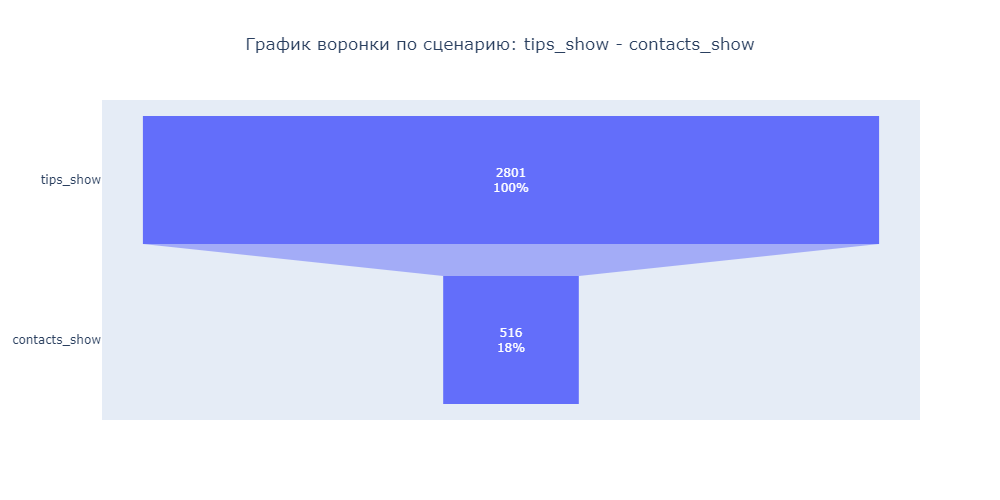

In [41]:
conversion( 'tips_show', 'contacts_show')

Функция работает корректно.

**Напишем функцию для построения воронки сценария с учетом времени совершения событий**

In [42]:
# создадим новый датафрейм удалив не нужные столбцы
df = events[['event_time','event_name','user_id']]
df.columns = ['time','name','distinct_id']
df.head()

,time,name,distinct_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349


In [43]:
# функция построения воронки с учетом времени совершения событий 
# учитываются только те события, которые произошли не раньше и не позднее чем step_interval после предыдущего события
def conversion_time(df, steps, from_date=None, to_date=None, step_interval=0):
    """
    Function used to create a dataframe that can be passed to functions for generating funnel plots.
    """
    # filter df for only events in the steps list
    df = df[['distinct_id', 'name', 'time']]
    df = df[df['name'].isin(steps)]

    values = []
    # for the rest steps, create a df and filter only for that step
    for i, step in enumerate(steps):
        if i == 0:
            dfs = {}

            dfs[step] = df[df['name'] == step] \
                .sort_values(['distinct_id', 'time'], ascending=True) \
                .drop_duplicates(subset=['distinct_id', 'name'], keep='first')

            # filter df of 1st step according to dates
            if from_date:
                dfs[step] = dfs[step][(dfs[step]['time'] >= from_date)]

            if to_date:
                dfs[step] = dfs[step][(dfs[step]['time'] <= to_date)]

        else:
            dfs[step] = df[df['name'] == step]

            # outer join with previous step
            merged = pd.merge(dfs[steps[i - 1]], dfs[step], on='distinct_id', how='outer')

            # keep only rows for which the distinct_ids appear in the previous step
            valid_ids = dfs[steps[i - 1]]['distinct_id'].unique()
            merged = merged[merged['distinct_id'].isin(valid_ids)]

            # keep only events that happened after previous step and sort by time
            merged = merged[(merged['time_y'] <=(merged['time_x'] + pd.Timedelta(step_interval, unit='m'))) 
                            & (merged['time_y'] >= merged['time_x'])].sort_values('time_y', ascending=True)

            # take the minimum time of the valid ones for each user
            merged = merged.drop_duplicates(subset=['distinct_id', 'name_x', 'name_y'], keep='first')

            # keep only the necessary columns and rename them to match the original structure
            merged = merged[['distinct_id', 'name_y', 'time_y']].rename({'name_y': 'name',
                                                                         'time_y': 'time'}, axis=1)

            # include the df in the df dictionary so that it can be joined to the next step's df
            dfs[step] = merged

        # append number of users to the "values" list
        values.append(len(dfs[step]))

    # create dataframe
    funnel_df = pd.DataFrame({'step': steps, 'val': values})
    # calculate percentage conversion for each step
    funnel_df['pct'] = (100 - 100 * abs(funnel_df['val'].pct_change()).fillna(0)).astype(int)
    # shift val by one to plot faded bars of previous step in background
    funnel_df['val-1'] = funnel_df['val'].shift(1)
    # calculate percentage conversion between each step and the first step in the funnel
    funnel_df['pct_from_first'] = (funnel_df['val'] / funnel_df['val'].loc[0] * 100).fillna(0).astype(int)

    #return funnel_df

    fig = go.Figure(go.Funnel(
    y = funnel_df['step'],
    x = funnel_df['val'],     
    textinfo = "value+percent initial" ))
    
    if len(steps) == 2:
        title = f'График воронки: {steps[0]} - {steps[1]}'
    else: 
         title = f'График воронки: {steps[0]} - {steps[1]} - {steps[2]}'
    
    fig.update_layout(title_text=title, title_x=0.5)

    fig.show(renderer='png', width=1000, height=500, scale=None)  

Построим график воронки для одного и того же сценария с помощью двух функций (без учета времени и с учетом времени сыбытия) и сравним результаты.

количество уникальных пользователей на шаге search: 1666
количество уникальных пользователей на шаге photos_show: 647
конверсия search - photos_show: 38.8%
количество уникальных пользователей на шаге contacts_show: 192
конверсия photos_show - contacts_show: 29.7%
конверсия сценария search - photos_show - contacts_show: 11.5%


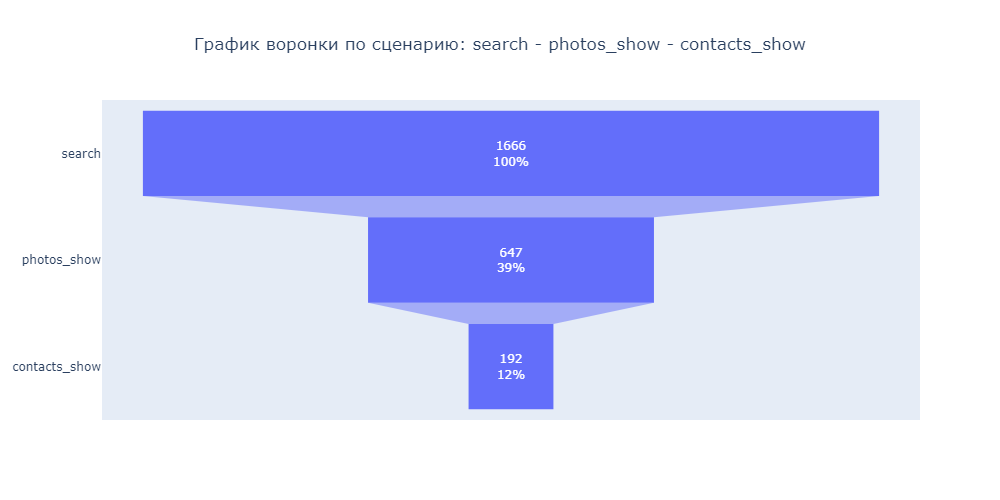

In [44]:
conversion('search', 'photos_show', 'contacts_show')

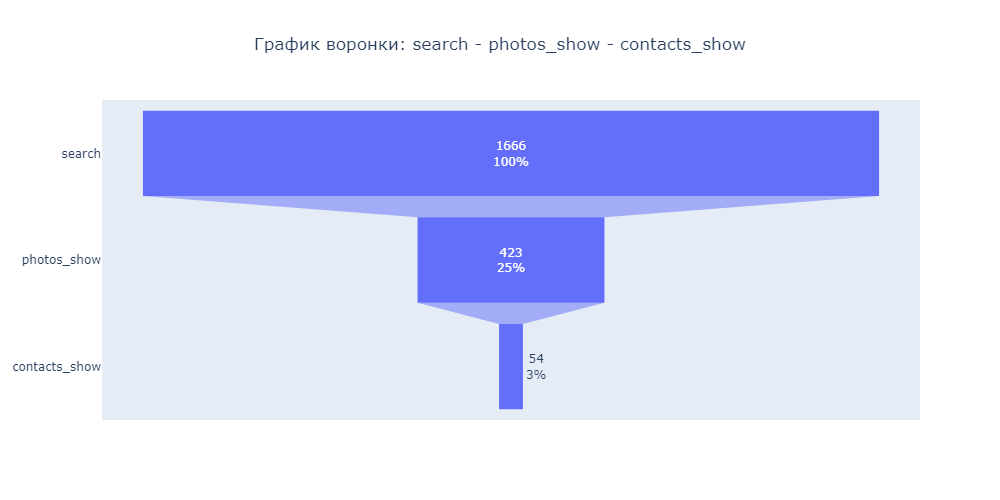

In [45]:
# в качестве интервала между действиями пользователя примем те же 17 минут (90-й процентиль)
conversion_time(df, ['search', 'photos_show', 'contacts_show'], from_date=None, to_date=None, step_interval=17)

Да, разница в конверсии (без учета времени действия пользователя и с учетом) принципиальная. В дальнейшем будем использовать функцию с учетом времени действия пользователя.

Найдём конверсии и построим воронки по всем типовым сценариям.

Найдём конверсию по сценарию **tips_show - contacts_show**

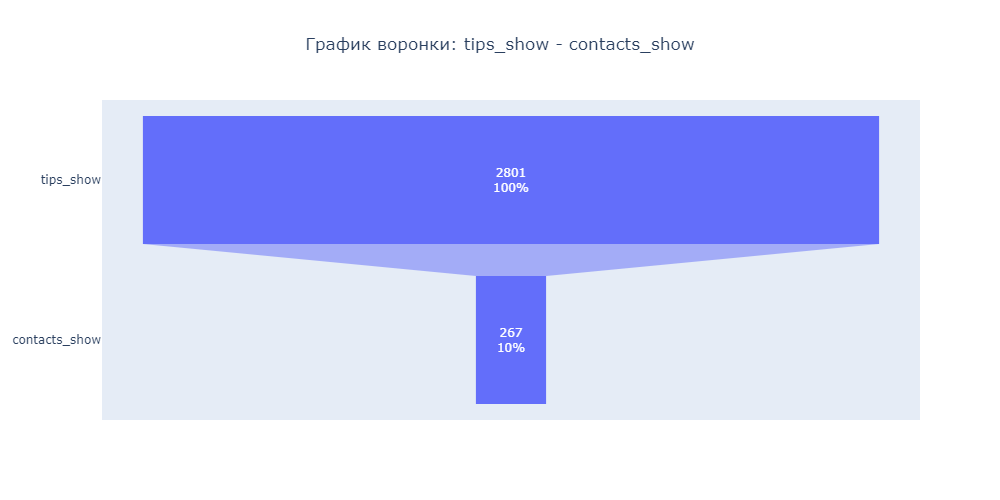

In [46]:
conversion_time(df, ['tips_show', 'contacts_show'], from_date=None, to_date=None, step_interval=17)

Найдём конверсию по сценарию **search - contacts_show**

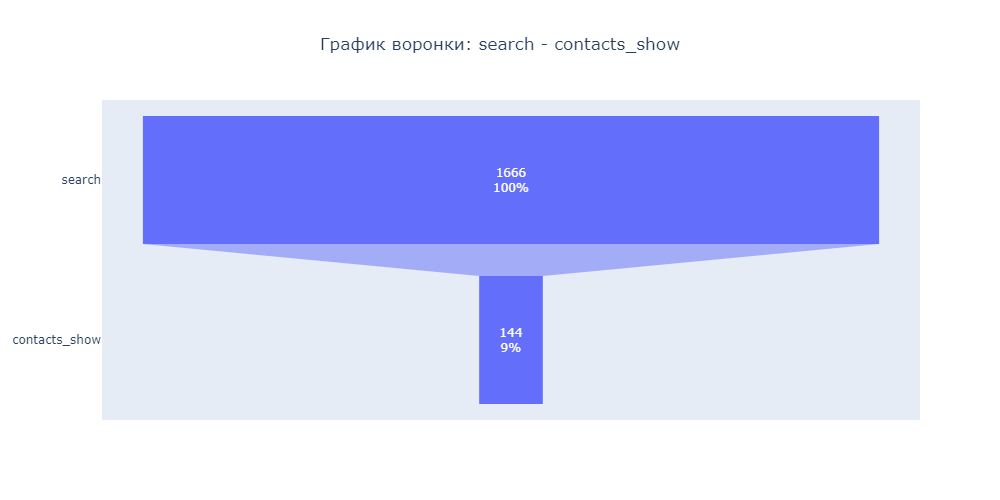

In [47]:
conversion_time(df, ['search', 'contacts_show'], from_date=None, to_date=None, step_interval=17)

Найдём конверсию по сценарию **photos_show - contacts_show**

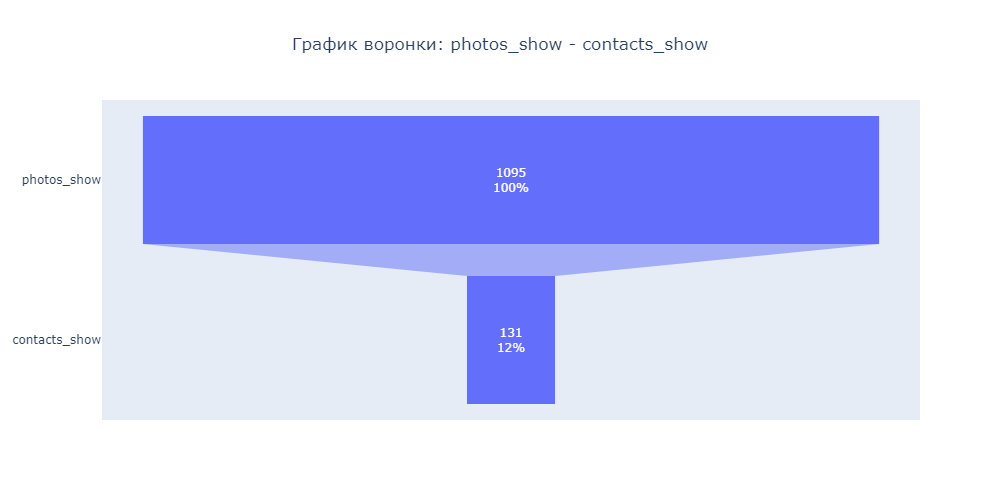

In [48]:
conversion_time(df, ['photos_show', 'contacts_show'], from_date=None, to_date=None, step_interval=17)

Найдём конверсию по сценарию **map - tips_show - contacts_show**

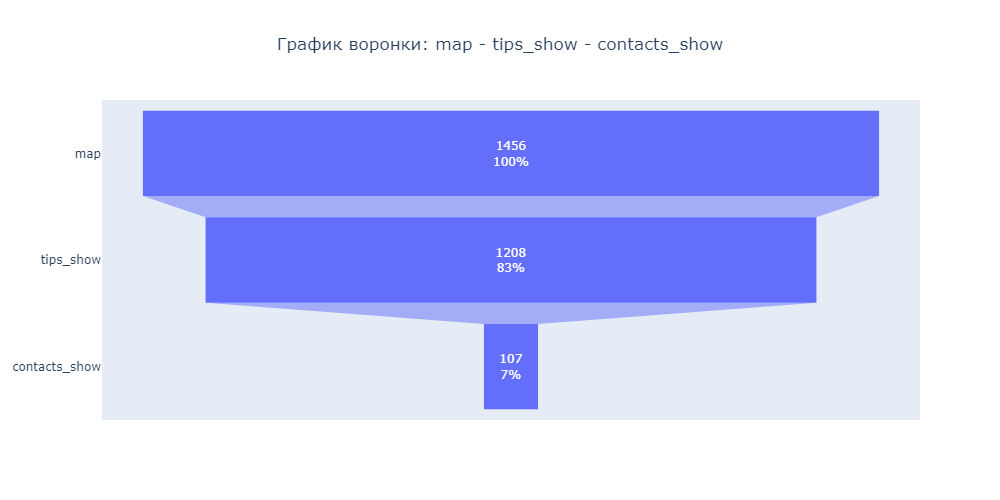

In [49]:
conversion_time(df, ['map', 'tips_show', 'contacts_show'], from_date=None, to_date=None, step_interval=17)

Найдём конверсию по сценарию **search - photos_show - contacts_show**

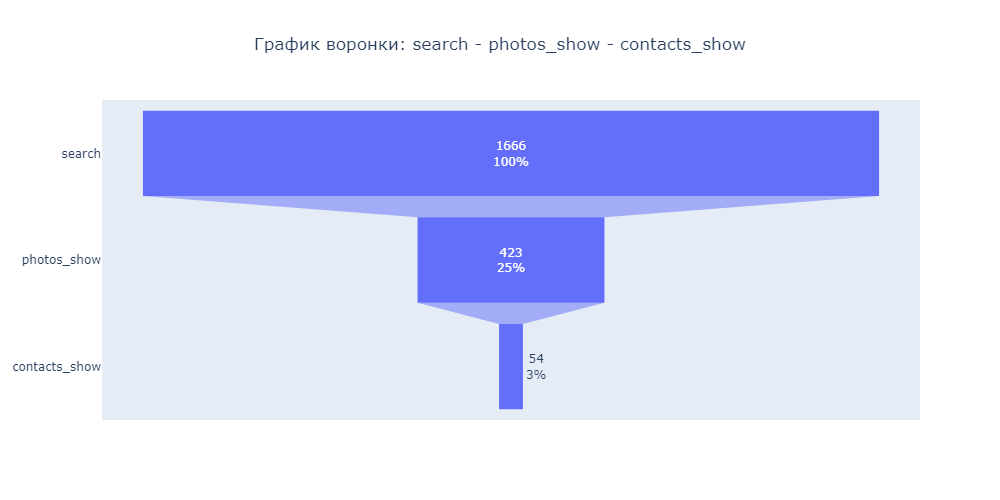

In [50]:
# построим воронку сценария search - tips_show - contacts_show
conversion_time(df, ['search', 'photos_show', 'contacts_show'], from_date=None, to_date=None, step_interval=17)

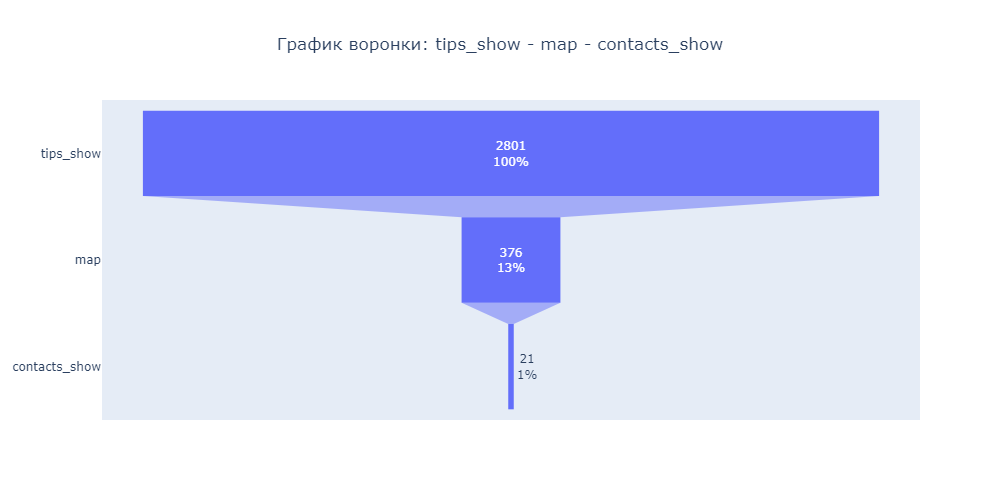

In [51]:
# построим воронку сценария tips_show - map - contacts_show
conversion_time(df, ['tips_show', 'map', 'contacts_show'], from_date=None, to_date=None, step_interval=17)

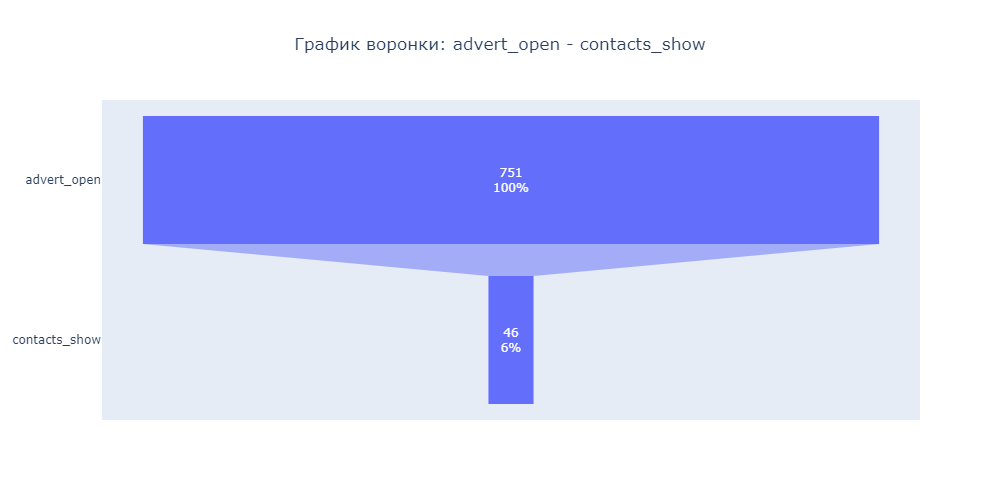

In [52]:
# построим воронку сценария advert_open - contacts_show
conversion_time(df, ['advert_open', 'contacts_show'], from_date=None, to_date=None, step_interval=17)

#### 2.2.1. Выводы по построению воронок по основным сценариям поведений пользователей

Сценарии, которые дают больше всего целевых действий:
- сценарии в 2 шага: 
    - tips_show - contacts_show,
    - search - contacts_show,
    - photos_chow - contacts_show 
    
- сценарии в 3 шага: 
    - map - tips_show - contacts_show,
    - search - photos_chow - contacts_show,
    - tips_show - map - contacts_show
    
    
Конверсия по сценарию `[photos_show, contacts_show]` существенно больше, чем по двум предыдущим более популярным сценариям. Следует рассмотреть гипотезу, что просмотр фото повышает конверсию. Целесообразно изменить дизайн приложения, с тем чтобы направить большее количество пользователей по этому пути. Предварительно провести А/Б-тестирование. 


Среди сценариев в 3 шага относительно высокой конверсией выделяется сценарий `[map, tips_show, contacts_show]`. Это тоже целесообразно учесть при работе с дизайном приложения.	

### 2.3. Построение Диаграммы Сенкея

In [53]:
# удалим из таблицы сессии и переименуем столбец
events_sankey = events[['user_id', 'event_time', 'event_name']]
events_sankey = events_sankey.rename(columns={'event_time': 'event_timestamp'})

Удалим повторяющиеся действия пользователей в рамках одного пользователя.
В противном случае диаграмма Сенкея получается много-шаговой и сложной для анализа.

In [54]:
events_sankey = events_sankey.drop_duplicates(subset=['event_name', 'user_id'])

In [55]:
def add_features(df):
    
    """Функция генерации новых столбцов для исходной таблицы

    Args:
        df (pd.DataFrame): исходная таблица.
    Returns:
        pd.DataFrame: таблица с новыми признаками.
    """
    
    # сортируем по id и времени
    sorted_df = df.sort_values(by=['user_id', 'event_timestamp']).copy()
    # добавляем шаги событий
    sorted_df['step'] = sorted_df.groupby('user_id').cumcount() + 1
    
    # добавляем узлы-источники и целевые узлы
    # узлы-источники - это сами события
    sorted_df['source'] = sorted_df['event_name']
    # добавляем целевые узлы
    sorted_df['target'] = sorted_df.groupby('user_id')['source'].shift(-1)
    
    # возврат таблицы без имени событий
    return sorted_df.drop(['event_name'], axis=1)
  
# преобразуем таблицу
table = add_features(events_sankey)
table.head()

,user_id,event_timestamp,step,source,target
805,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,1,tips_show,map
6541,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09 18:33:55.577963,2,map,NaN
31632,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,1,search,photos_show
31655,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:40:38.990477,2,photos_show,favorites_add
33510,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-20 19:03:02.030004,3,favorites_add,contacts_show


In [56]:
# для обоснования количества шагов (которые нужно отобразить в диаграмме Санкея) 
# найдём распределение количества сессий по количеству шагов
events_unique.groupby('session_id')['step'].max().value_counts()

step
1    6037
2    3447
3    1321
4     408
5      68
6       5
Name: count, dtype: int64

Количество сессий с числом шагов 5 и более составляет 73. Эти сценарии не будут являться основными типовыми. С практической точки зрения сценариями с числом шагов более 4 или даже 3 можно пренебречь.

In [57]:
# удалим все пары source-target, шаг которых превышает 4
# и сохраним полученную таблицу в отдельную переменную
df_comp = table[table['step'] <= 4].copy().reset_index(drop=True)

In [58]:
def get_source_index(df):
    
    """Функция генерации индексов source

    Args:
        df (pd.DataFrame): исходная таблица с признаками step, source, target.
    Returns:
        dict: словарь с индексами, именами и соответсвиями индексов именам source.
    """
    
    res_dict = {}
    
    count = 0
    # получаем индексы источников
    for no, step in enumerate(df['step'].unique().tolist()):
        # получаем уникальные наименования для шага
        res_dict[no+1] = {}
        res_dict[no+1]['sources'] = df[df['step'] == step]['source'].unique().tolist()
        res_dict[no+1]['sources_index'] = []
        for i in range(len(res_dict[no+1]['sources'])):
            res_dict[no+1]['sources_index'].append(count)
            count += 1
            
    # соединим списки
    for key in res_dict:
        res_dict[key]['sources_dict'] = {}
        for name, no in zip(res_dict[key]['sources'], res_dict[key]['sources_index']):
            res_dict[key]['sources_dict'][name] = no
    return res_dict
  

# создаем словарь
source_indexes = get_source_index(df_comp)

In [59]:
def generate_random_color():
    
    """Случайная генерация цветов rgba

    Args:
        
    Returns:
        str: Строка со сгенерированными параметрами цвета
    """
    
    # сгенерим значение для каждого канала
    r, g, b = np.random.randint(255, size=3)
    return f'rgba({r}, {g}, {b}, 1)'

In [60]:
import requests
import numpy as np

def colors_for_sources(mode):
    
    """Генерация цветов rgba

    Args:
        mode (str): сгенерировать случайные цвета, если 'random', а если 'custom' - 
                    использовать заранее подготовленные
    Returns:
        dict: словарь с цветами, соответствующими каждому индексу
    """
    # словарь, в который сложим цвета в соответствии с индексом
    colors_dict = {}
    
    if mode == 'random':
        # генерим случайные цвета
        for label in df_comp['source'].unique():
            r, g, b = np.random.randint(255, size=3)            
            colors_dict[label] = f'rgba({r}, {g}, {b}, 1)'
            
    elif mode == 'custom':
        # присваиваем ранее подготовленные цвета
        colors = requests.get('https://raw.githubusercontent.com/rusantsovsv/senkey_tutorial/main/json/colors_senkey.json').json()
        for no, label in enumerate(df_comp['source'].unique()):
            colors_dict[label] = colors['custom_colors'][no]
            
    return colors_dict
   
# генерю цвета из своего списка
colors_dict = colors_for_sources(mode='custom')

In [61]:
def percent_users(sources, targets, values):
    
    """
    Расчет уникальных id в процентах (для вывода в hover text каждого узла)
    
    Args:
        sources (list): список с индексами source.
        targets (list): список с индексами target.
        values (list): список с "объемами" потоков.
        
    Returns:
        list: список с "объемами" потоков в процентах
    """
    
    # объединим источники и метки и найдем пары
    zip_lists = list(zip(sources, targets, values))
    
    new_list = []
    
    # подготовим список словарь с общим объемом трафика в узлах
    unique_dict = {}
    
    # проходим по каждому узлу
    for source, target, value in zip_lists:
        if source not in unique_dict:
            # находим все источники и считаем общий трафик
            unique_dict[source] = 0
            for sr, tg, vl in zip_lists:
                if sr == source:
                    unique_dict[source] += vl
                    
    # считаем проценты
    for source, target, value in zip_lists:
        new_list.append(round(100 * value / unique_dict[source], 1))
    
    return new_list

In [62]:
from tqdm import tqdm

def lists_for_plot(source_indexes=source_indexes, colors=colors_dict, frac=10):
    
    """
    Создаем необходимые для отрисовки диаграммы переменные списков и возвращаем
    их в виде словаря
    
    Args:
        source_indexes (dict): словарь с именами и индексами source.
        colors (dict): словарь с цветами source.
        frac (int): ограничение на минимальный "объем" между узлами.
        
    Returns:
        dict: словарь со списками, необходимыми для диаграммы.
    """
    
    sources = []
    targets = []
    values = []
    labels = []
    link_color = []
    link_text = []

    # проходим по каждому шагу
    for step in tqdm(sorted(df_comp['step'].unique()), desc='Шаг'):
        if step + 1 not in source_indexes:
            continue

        # получаем индекс источника
        temp_dict_source = source_indexes[step]['sources_dict']

        # получаем индексы цели
        temp_dict_target = source_indexes[step+1]['sources_dict']

        # проходим по каждой возможной паре, считаем количество таких пар
        for source, index_source in tqdm(temp_dict_source.items()):
            for target, index_target in temp_dict_target.items():
                # делаем срез данных и считаем количество id            
                temp_df = df_comp[(df_comp['step'] == step)&(df_comp['source'] == source)&(df_comp['target'] == target)]
                value = len(temp_df)
                # проверяем минимальный объем потока и добавляем нужные данные
                if value > frac:
                    sources.append(index_source)
                    targets.append(index_target)
                    values.append(value)
                    # делаем поток прозрачным для лучшего отображения
                    link_color.append(colors[source].replace(', 1)', ', 0.2)'))
                    
    labels = []
    colors_labels = []
    for key in source_indexes:
        for name in source_indexes[key]['sources']:
            labels.append(name)
            colors_labels.append(colors[name])
            
    # посчитаем проценты всех потоков
    perc_values = percent_users(sources, targets, values)
    
    # добавим значения процентов для howertext
    link_text = []
    for perc in perc_values:
        link_text.append(f"{perc}%")
    
    # возвратим словарь с вложенными списками
    return {'sources': sources, 
            'targets': targets, 
            'values': values, 
            'labels': labels, 
            'colors_labels': colors_labels, 
            'link_color': link_color, 
            'link_text': link_text}
  

# создаем словарь
data_for_plot = lists_for_plot()

Шаг: 100%|██████████| 4/4 [00:00<00:00,  9.78it/s]


In [63]:
import plotly.graph_objects as go

def plot_senkey_diagram(data_dict=data_for_plot):    
    
    """
    Функция для генерации объекта диаграммы Сенкей 
    
    Args:
        data_dict (dict): словарь со списками данных для построения.
        
    Returns:
        plotly.graph_objs._figure.Figure: объект изображения.
    """
    
    fig = go.Figure(data=[go.Sankey(
        domain = dict(
          x =  [0,1],
          y =  [0,1]
        ),
        orientation = "h",
        valueformat = ".0f",
        node = dict(
          pad = 50,
          thickness = 15,
          line = dict(color = "black", width = 0.1),
          label = data_dict['labels'],
          color = data_dict['colors_labels']
        ),
        link = dict(
          source = data_dict['sources'],
          target = data_dict['targets'],
          value = data_dict['values'],
          label = data_dict['link_text'],
          color = data_dict['link_color']
      ))])
    fig.update_layout(title_text="Sankey Diagram", font_size=10, width=1000, height=800)
    
    # возвращаем объект диаграммы
    return fig
  

# сохраняем диаграмму в переменную
senkey_diagram = plot_senkey_diagram()

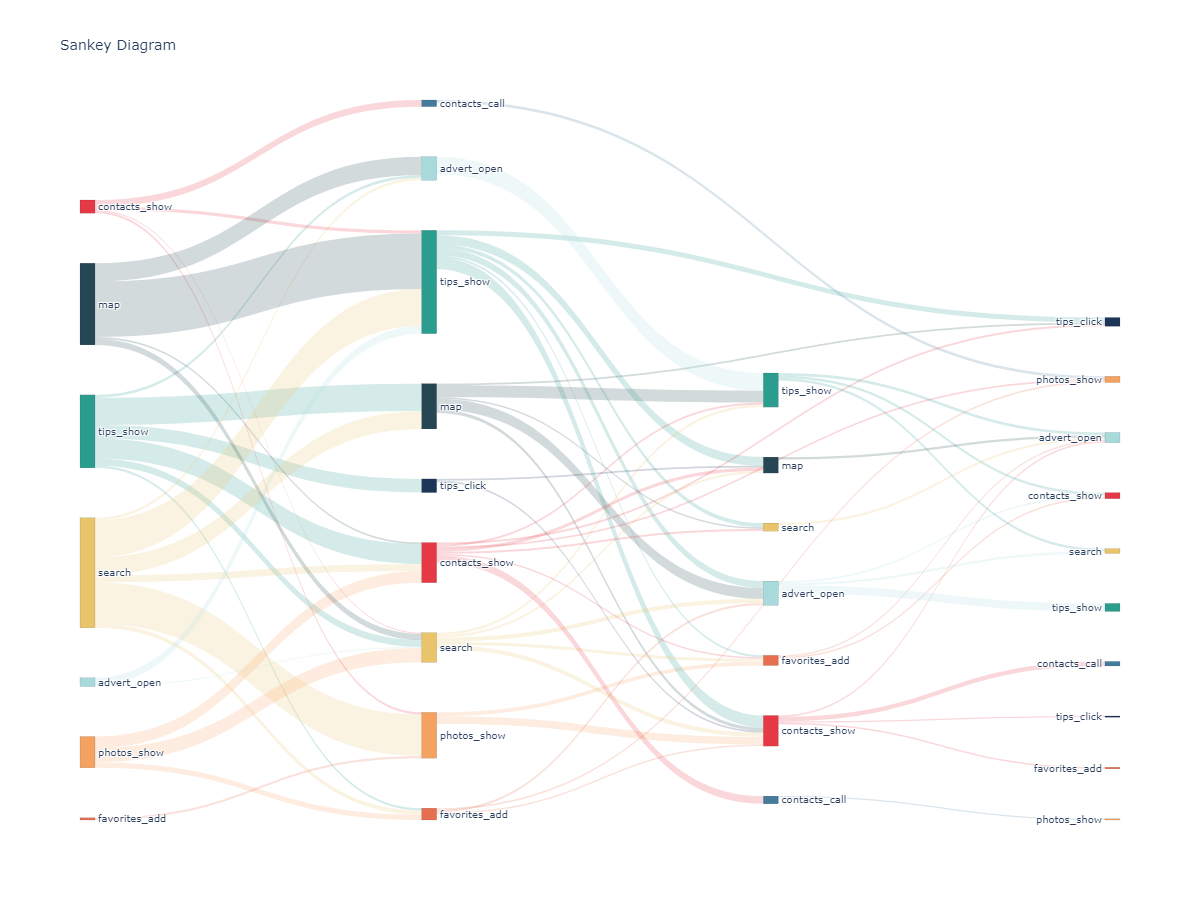

In [64]:
senkey_diagram.show(renderer='png', width=1200, height=900, scale=None)

#### 2.3.1. Выводы по диаграмме Санкея
1. Сценарии, которые дают больше всего целевых действий:
- сценарии в 2 шага: 
    - tips_show - contacts_show, 
    - photos_chow - contacts_show, 
    - search - contacts_show.
- сценарии в 3 шага: 
    - map - tips_show - contacts_show, 
    - search - photos_chow - contacts_show

Это почти совпадает с таблицей наиболее частых сценариев.

По диаграмме Санкея, самая высокая конверсия в сценарии `photos_chow - contacts_show`, она составляет 37,2%.

### 2.4. Расчет относительной частоты событий в разрезе двух групп пользователей: 

Пользователи, которые смотрели контакты (первая группа)

In [65]:
users_contacts_show = events[events['event_name'] == 'contacts_show']['user_id'].drop_duplicates()
users_contacts_show.count()

981

Пользователи, которые не смотрели контакты (вторая группа)

In [66]:
users_not_contacts_show = events[~events['user_id'].isin(users_contacts_show)]['user_id']
users_not_contacts_show.nunique()

3312

In [67]:
# события у пользователей, которые смотрели контакты
events_users_contacts_show = events[events['user_id'].isin(users_contacts_show)]['event_name'].value_counts().reset_index()
events_users_contacts_show.columns = ['event_name', 'count']
events_users_contacts_show

,event_name,count
0,tips_show,12768
1,contacts_show,4529
2,photos_show,3828
3,search,2084
4,advert_open,1589
5,map,1101
6,contacts_call,541
7,favorites_add,424
8,tips_click,333


Для корректного сравнения относительной частоты событий у двух групп пользателей, посчитаем общее количество событий в первой группе без `contacts_show и contacts_call`, так как этих действий нет во второй группе. 
В противном случае, если этого не сделать, то в первой группе всегда будет заниженная относительная частота событий, т.к. все собития распределяются на большее количество категорий.

In [68]:
# общее количество событий у пользователей, которые смотрели контакты (но без contacts_show и contacts_call)
count_events_users_contacts_show = events[events['user_id'].isin(users_contacts_show)]['event_name']

count_events_users_contacts_show = count_events_users_contacts_show.isin(['search', 'photos_show', 'favorites_add', 
      'advert_open', 'tips_show', 'map', 'tips_click' ]).sum()

count_events_users_contacts_show

22127

In [69]:
events_users_contacts_show

,event_name,count
0,tips_show,12768
1,contacts_show,4529
2,photos_show,3828
3,search,2084
4,advert_open,1589
5,map,1101
6,contacts_call,541
7,favorites_add,424
8,tips_click,333


In [70]:
# расчитаем относительную частоту событий у пользователей, которые смотрели контакты
events_users_contacts_show['event_rate, %'] = round((events_users_contacts_show['count'] 
                                                          / count_events_users_contacts_show) * 100, 2)

events_users_contacts_show

,event_name,count,"event_rate, %"
0,tips_show,12768,57.70
1,contacts_show,4529,20.47
2,photos_show,3828,17.30
3,search,2084,9.42
4,advert_open,1589,7.18
5,map,1101,4.98
6,contacts_call,541,2.44
7,favorites_add,424,1.92
8,tips_click,333,1.50


In [71]:
# события у пользователей которые не смотрели контакты
events_users_not_contacts_show = events[events['user_id'].isin(users_not_contacts_show)]['event_name'].value_counts().reset_index()

events_users_not_contacts_show.columns = ['event_name', 'count']
events_users_not_contacts_show

,event_name,count
0,tips_show,27287
1,photos_show,6184
2,search,4700
3,advert_open,4575
4,map,2780
5,favorites_add,993
6,tips_click,481


In [72]:
# общее количество событий у пользователей, которые не смотрели контакты
count_events_users_not_contacts_show = events[events['user_id'].isin(users_not_contacts_show)]['event_name'].count()
count_events_users_not_contacts_show

47000

In [73]:
# расчитаем относительную частоту событий у пользователей, которые не смотрели контакты
events_users_not_contacts_show['event_rate, %'] = round((events_users_not_contacts_show['count'] 
                                                          / count_events_users_not_contacts_show) * 100, 2)

events_users_not_contacts_show

,event_name,count,"event_rate, %"
0,tips_show,27287,58.06
1,photos_show,6184,13.16
2,search,4700,10.00
3,advert_open,4575,9.73
4,map,2780,5.91
5,favorites_add,993,2.11
6,tips_click,481,1.02


In [74]:
# объединение таблиц с сохранением всех строк из первого датафрейма
relative_event_frequency = pd.merge(events_users_contacts_show, events_users_not_contacts_show, on='event_name', how='left')

print('\033[1m' + 'Относительная частота событий в разрезе двух групп пользователей' + '\033[0m')
print()
print('\033[1m' + '   Смотрели контакты                   Не смотрели контакты' + '\033[0m')
relative_event_frequency

Относительная частота событий в разрезе двух групп пользователей

   Смотрели контакты                   Не смотрели контакты


,event_name,count_x,"event_rate, %_x",count_y,"event_rate, %_y"
0,tips_show,12768,57.70,27287.0,58.06
1,contacts_show,4529,20.47,NaN,NaN
2,photos_show,3828,17.30,6184.0,13.16
3,search,2084,9.42,4700.0,10.00
4,advert_open,1589,7.18,4575.0,9.73
5,map,1101,4.98,2780.0,5.91
6,contacts_call,541,2.44,NaN,NaN
7,favorites_add,424,1.92,993.0,2.11
8,tips_click,333,1.50,481.0,1.02


#### 2.4.1. Выводы по расчету относительной частоты событий в разрезе двух групп пользователей

Пользователи, которые смотрели контакты, делали существенно больше действий:
- `photos_show` (ранее было замечено, что у сценария `photos_show - contacts_show` относительно высокая конверсия, это плюс к выдвинутой гипотезе); 
- и `tips_click`	



## 2.5. Проверка гипотез

#### Гипотеза № 1
Одни пользователи совершают действия `tips_show и tips_click`, другие только `tips_show`. Гипотеза: конверсия в просмотры контактов различается у этих групп.


Но: конверсия в просмотры контактов у этих групп не отличается.

Н1: конверсия в просмотры контактов у этих групп отличается.

Пользователи, которые совершают действия `tips_show и tips_click`

In [75]:
# пользователи, которые совершили tips_show
users_tips_show = events[events['event_name'] == 'tips_show']['user_id']
users_tips_show.nunique()

2801

In [76]:
# пользователи, которые совершили tips_show и после этого совершили tips_click
users_tips_show_tips_click = (events[(events['event_name'] == 'tips_click')
                                     & (events['user_id'].isin(users_tips_show))]['user_id'])
users_tips_show_tips_click.nunique()

297

In [77]:
# пользователи, которые совершили tips_show, tips_click и contacts_show
users_tips_show_tips_click_contacts_show = (events[(events['event_name'] == 'contacts_show')
                                     & (events['user_id'].isin(users_tips_show_tips_click))]['user_id'])

users_tips_show_tips_click_contacts_show.nunique()

91

In [78]:
# конверсия в contacts_show
round(users_tips_show_tips_click_contacts_show.nunique() / users_tips_show_tips_click.nunique(), 2)

0.31

Пользователи, которые совершают действия `tips_show`, но не совершают `tips_click`

In [79]:
# пользователи, которые совершили tips_click
users_tips_click = events[events['event_name'] == 'tips_click']['user_id']
users_tips_click.nunique()

322

In [80]:
# пользователи, которые совершили tips_show и не совершили tips_click
users_tips_show_not_tips_click = (events[(events['event_name'] == 'tips_show')
                        & (~events['user_id'].isin(users_tips_click))]['user_id'])

users_tips_show_not_tips_click.nunique()

2504

In [81]:
# пользователи, которые совершили tips_show, не совершили tips_click и совершили contacts_show
users_tips_show_not_tips_click_contacts_show = (events[(events['event_name'] == 'contacts_show')
                        & (events['user_id'].isin(users_tips_show_not_tips_click))]['user_id'])

users_tips_show_not_tips_click_contacts_show.nunique()

425

In [82]:
# конверсия в contacts_show
round(users_tips_show_not_tips_click_contacts_show.nunique() / users_tips_show_not_tips_click.nunique(), 2)

0.17

In [83]:
# проверка гипотез
import math
from scipy.stats import norm

p = 0.01 # уровень значимости

# данные для группы 1
n1 = users_tips_show_tips_click.nunique()  # Общее количество наблюдений
x1 = users_tips_show_tips_click_contacts_show.nunique()  # Количество успехов (просмотры контактов)

# данные для группы 2
n2 = users_tips_show_not_tips_click.nunique()  # Общее количество наблюдений
x2 = users_tips_show_not_tips_click_contacts_show.nunique()  # Количество успехов (просмотры контактов)

# рассчитываем конверсии в просмотры контактов для каждой группы
p1 = x1 / n1
p2 = x2 / n2

# рассчитываем стандартную ошибку для разности долей
se = math.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2))

# рассчитываем z-статистику
z = (p1 - p2) / se

# рассчитываем p-значение
p_value = 2 * (1 - norm.cdf(abs(z)))

print("Z-статистика:", z)
print("P-значение:", p_value)

if p_value < p:
    print('Нулевая гипотеза отвергается')
else:   
    print('Нулевая гипотеза не отвергается')    

Z-статистика: 4.919371422258935
P-значение: 8.682257939263138e-07
Нулевая гипотеза отвергается


#### Вывод
Нулевая гипотеза отвергается. Конверсия в просмотры контактов различается у этих групп.

#### Гипотеза № 2
Одни пользователи совершают действия `tips_show`, другие `search`. Гипотеза: конверсия в просмотры контактов различается у этих групп.


Но: конверсия в просмотры контактов у этих групп не отличается.

Н1: конверсия в просмотры контактов у этих групп отличается.

Пользователи, которые совершают действия `tips_show`

In [84]:
# пользователи, которые совершили tips_show
users_tips_show = events[events['event_name'] == 'tips_show']['user_id']
users_tips_show.nunique()

2801

Пользователи, которые совершают действия `search` 

In [85]:
# пользователи, которые совершили search
users_search = events[events['event_name'] == 'search']['user_id']
users_search.nunique()

1666

**Первая группа.** Пользователи, которые совершили tips_show и не совершали search.

In [86]:
# пользователи, которые совершили tips_show и не совершали search 
users_tips_show_not_search = (events[(events['event_name'] == 'tips_show')                                    
                                      & (~events['user_id'].isin(users_search))]['user_id'])

users_tips_show_not_search.nunique()

2000

In [87]:
# пользователи, которые совершили tips_show, не совершали search и совершили contacts_show
users_tips_show_not_search_contacts_show = (events[(events['event_name'] == 'contacts_show')
                                      & (events['user_id'].isin(users_tips_show))
                                      & (~events['user_id'].isin(users_search))]['user_id'])

users_tips_show_not_search_contacts_show.nunique()

377

In [88]:
# конверсия в contacts_show
round(users_tips_show_not_search_contacts_show.nunique() / users_tips_show_not_search.nunique(), 2)

0.19

**Вторая группа.** Пользователи, которые совершили search  и не совершали tips_show .

In [89]:
# пользователи, которые совершили search и не совершали tips_show 
users_search_not_tips_show = (events[(events['event_name'] == 'search')                                    
                                      & (~events['user_id'].isin(users_tips_show))]['user_id'])

users_search_not_tips_show.nunique()

865

In [90]:
# пользователи, которые совершили search, не совершали tips_show и совершили contacts_show
users_search_not_tips_show_contacts_show = (events[(events['event_name'] == 'contacts_show')
                                      & (~events['user_id'].isin(users_tips_show))
                                      & (events['user_id'].isin(users_search))]['user_id'])

users_search_not_tips_show_contacts_show.nunique()

238

In [91]:
# конверсия в contacts_show
round(users_search_not_tips_show_contacts_show.nunique() / users_search_not_tips_show.nunique(), 2)

0.28

In [92]:
# проверка гипотез
import math
from scipy.stats import norm

p = 0.01 # уровень значимости

# данные для группы 1
n1 = users_tips_show_not_search.nunique() # Общее количество наблюдений
x1 = users_tips_show_not_search_contacts_show.nunique()  # Количество успехов (просмотры контактов)

# данные для группы 2
n2 = users_search_not_tips_show.nunique()  # Общее количество наблюдений
x2 = users_search_not_tips_show_contacts_show.nunique() # Количество успехов (просмотры контактов)

# рассчитываем конверсии в просмотры контактов для каждой группы
p1 = x1 / n1
p2 = x2 / n2

# рассчитываем стандартную ошибку для разности долей
se = math.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2))

# рассчитываем z-статистику
z = (p1 - p2) / se

# рассчитываем p-значение
p_value = 2 * (1 - norm.cdf(abs(z)))

print("Z-статистика:", z)
print("P-значение:", p_value)

if p_value < p:
    print('Нулевая гипотеза отвергается')
else:   
    print('Нулевая гипотеза не отвергается')  

Z-статистика: -4.944657776411038
P-значение: 7.627774287755074e-07
Нулевая гипотеза отвергается


#### Вывод
Нулевая гипотеза отвергается. Конверсия в просмотры контактов различается у этих групп.

## Выводы и рекомендации

В процессе исследования было выполнено следующее.

**Загружены данные и выполнена их предобработка.**

В результате предобработки данных было выполнено:
1. Названия столбцов были приведены к "питоновскому" стилю.
2. Тип данных в столбце `event_time` был изменен на тип `дата`.
3. Общая информация о данных показала отсутсвие пропущеных данных.
4. Проведена проверка на дубликаты.
5. Объединены данные, которые означают одно и тоже действие пользователя `show_contacts` и `contacts_show`. Объединены даные по семи видам поиска в одно действие пользователя - поиск.

**Найдены наиболее частые типовые сценарии действий пользователя, приводящие к целевому действию `contacts_show`**

9 наиболее частых типовых сценариев, общее количество:
- `['tips_show', 'contacts_show']`  -  449
- `['search', 'contacts_show']`  -  147
- `['photos_show', 'contacts_show']`  -  138
- `['map', 'tips_show', 'contacts_show']`  -  97
- `['search', 'photos_show', 'contacts_show']`  -  54
- `['search', 'tips_show', 'contacts_show']`  -  38
- `['map', 'contacts_show']`  -  35
- `['tips_show', 'map', 'contacts_show']`  -  29
- `['tips_show', 'tips_click', 'contacts_show']`  -  20

3 первых сценария составляют: 73.0 % от общего количества сценариев

**Построены воронки по основным сценариям поведений пользователей**

Сценарии, которые дают больше всего целевых действий и их конверсия:
- сценарии в 2 шага: 
    - tips_show - contacts_show, коверсия 9,5%
    - search - contacts_show, конверсия 8,6%
    - photos_chow - contacts_show, конверсия 12% 
    
- сценарии в 3 шага: 
    - map - tips_show - contacts_show, конверсия 7,3%
    - search - photos_chow - contacts_show, конверсия 3,2%
    
**Рекомендации**

Конверсия по сценарию `[photos_show, contacts_show]` существенно больше, чем по двум предыдущим более популярным сценариям. Следует рассмотреть гипотезу, что просмотр фото повышает конверсию. Целесообразно изменить дизайн приложения, с тем чтобы направить большее количество пользователей по этому пути. Предварительно провести А/Б-тестирование. 


Среди сценариев в 3 шага относительно высокой конверсией выделяется сценарий `[map, tips_show, contacts_show]`. Это тоже целесообразно учесть при работе с дизайном приложения.	


**Построена диаграмма Санкея**

По диаграмме Санкея сценарии, которые дают больше всего целевых действий, следующие:
- сценарии в 2 шага: 
    - tips_show - contacts_show, 
    - photos_chow - contacts_show, 
    - search - contacts_show.
- сценарии в 3 шага: 
    - map - tips_show - contacts_show, 
    - search - photos_chow - contacts_show

По диаграмме Санкея, самая высокая конверсия в сценарии `photos_chow - contacts_show`, она составляет 37,2%.


**Выполнен расчет относительной частоты событий в разрезе двух групп пользователей - пользователей, которые смотрели контакты, и пользователей, которые не смотрели контакты.**

Пользователи, которые смотрели контакты, делали существенно больше действий:
- `photos_show` (ранее было замечено, что у сценария `photos_show - contacts_show` высокая конверсия); 
- и `tips_click`	

**Проведена проверка гипотез**

Гипотеза № 1.

Одни пользователи совершают действия `tips_show и tips_click`, другие только `tips_show`. Гипотеза: конверсия в просмотры контактов различается у этих групп.

Проверка показала, конверсия в просмотры контактов у этих групп имеет статистически значимые отличия.

Гипотеза № 2

Одни пользователи совершают действия `tips_show`, другие `search`. Гипотеза: конверсия в просмотры контактов различается у этих групп.

Проверка показала, конверсия в просмотры контактов у этих групп имеет статистически значимые отличия.